In [74]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('imovel_limpo.xlsx')


In [75]:
# Visualização 
display(df)

,metragem(m²),quartos,banheiros,vagas,valor,nomeRua,condominio,iptu
0,530,5,6,0,5000000,Rua não encontrada,0,0
1,562,0,0,0,285000,Rua alice cintra bormam,1476,195
2,72,2,2,1,290000,Rua estrela velha,0,0
3,208,0,0,0,100000,Rua virtude lopes de freitas,0,0
4,170,4,1,0,350000,Rua não encontrada,0,0
...,...,...,...,...,...,...,...,...
100,360,4,6,8,2350000,Rua república do iraque,0,1375
101,70,2,1,1,620000,Rua sete de outubro,740,200
102,37,0,1,1,223000,Rua dona elisa fláquer,400,0
103,397,1,8,7,1300000,Rua albertina nascimento,0,586


In [76]:
# a. Qual é a média do tamanho dos imóveis (metros)?

media_metragem = df['metragem(m²)'].mean()
print(f"A média do tamanho é: {media_metragem:.02f}m² " )

media_metragem = df2['metragem(m²)'].mean()
print(f"A média do tamanho é: {media_metragem:.02f}m² " )


A média do tamanho é: 194.03m² 
A média do tamanho é: 350.79m² 


In [77]:
# b. Qual a média do número de quartos, banheiros e vagas?

media_quartos = df['quartos'].mean()
print(f"A média de quartos é: {media_quartos:.02f}" )

media_banheiros = df['banheiros'].mean()
print(f"A média de banheiros é: {media_banheiros:.02f}" )

media_vaga = df['vagas'].mean()
print(f"A média de vagas é: {media_vaga:.02f}" )

A média de quartos é: 2.12
A média de banheiros é: 1.99
A média de vagas é: 2.30


In [78]:
# c. Qual é o valor médio do IPTU e do condomínio?

media_iptu = df['iptu'].mean()
print(f"A média de iptu é: R${media_iptu:.02f}" )

media_condominio = df['condominio'].mean()
print(f"A média de condominio é: R${media_condominio:.02f}" )

A média de iptu é: R$197.18
A média de condominio é: R$210.50


In [79]:
# d. Existe alguma correlação entre o valor do imóvel e o tamanho em metros quadrados? (A correlação pode ser calculada com a função corr() do Pandas.)

correlacao = df['valor'].corr(df['metragem(m²)'])
print(f"A correlação entre o valor do imóvel entre a metragem é: {correlacao:.02f}" )

A correlação entre o valor do imóvel entre a metragem é: 0.74


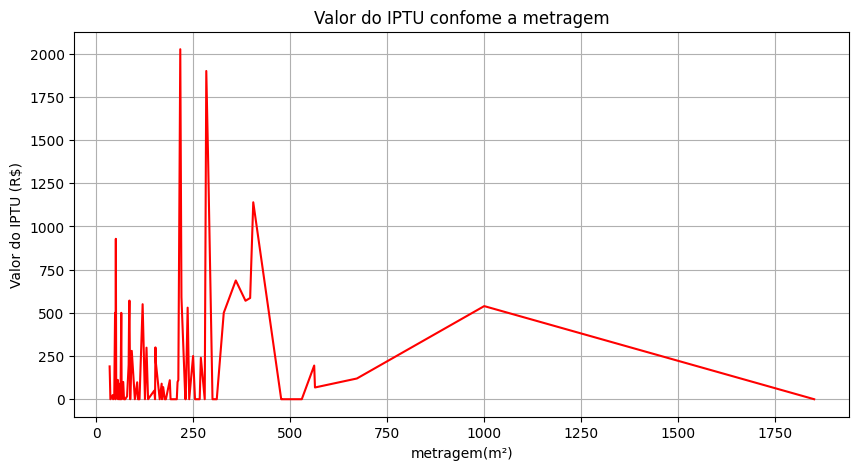

In [80]:
# e. Imóveis maiores têm um IPTU mais alto?

metragem_por_iptu = df.groupby('metragem(m²)')['iptu'].mean()

metragem_por_iptu.plot(linestyle='-', figsize=(10,5), color='red')
plt.title("Valor do IPTU confome a metragem")
plt.ylabel('Valor do IPTU (R$)')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

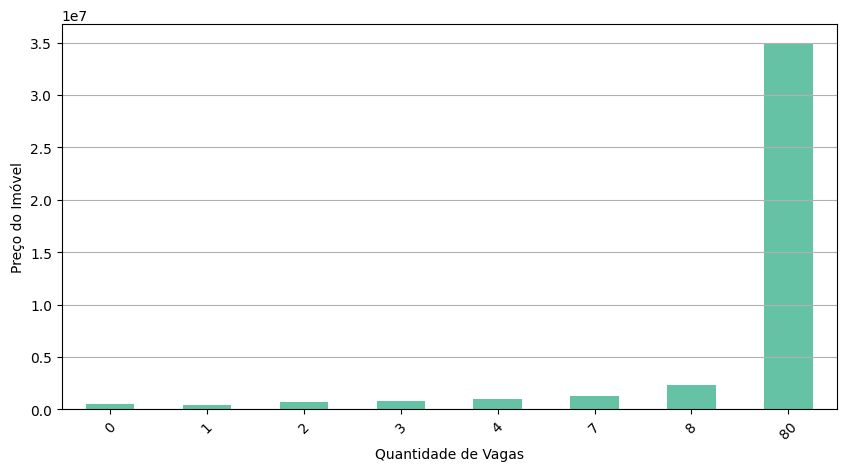

In [81]:
# f. A quantidade de vagas de garagem está relacionada ao preço do imóvel?

relacao_qntVagas_precoImovel = df.groupby('vagas')['valor'].mean()

relacao_qntVagas_precoImovel.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.ylabel('Preço do Imóvel')
plt.xlabel('Quantidade de Vagas')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# g. Existem imóveis com valores de metros ou preço muito acima ou abaixo da média?

# preços muito altos ou baixos em relação a MÉDIA
# metragem muito acima ou abaixo da MÉDIA
import numpy as np

media_valor = df['valor'].mean()
media_metragem = df['metragem(m²)'].mean()

valor_q1 = df['valor'].quantile(0.25)
valor_q3 = df['valor'].quantile(0.75)
valor_iqr = valor_q3 - valor_q1

metragem_q1 = df['metragem(m²)'].quantile(0.25)
metragem_q3 = df['metragem(m²)'].quantile(0.75)
metragem_iqr = metragem_q3 - metragem_q1


valor_limite_minimo = valor_q1 - 1.5 * valor_iqr
valor_limite_maximo = valor_q3 + 1.5 * valor_iqr

metragem_limite_minimo = metragem_q1 - 1.5 * metragem_iqr
metragem_limite_maximo = metragem_q3 + 1.5 * metragem_iqr


outliers_valor_abaixo = df[df['valor'] < valor_limite_minimo]
outliers_valor_acima = df[df['valor'] > valor_limite_maximo]

print(f'{valor_limite_maximo, valor_limite_minimo}')

print("Imóveis com VALOR muito abaixo do esperado:")
display(outliers_valor_abaixo)

print("Imóveis com VALOR muito acima do esperado:")
display(outliers_valor_acima)



# exibição
outliers_metragem_abaixo = df[df['metragem(m²)'] < metragem_limite_minimo]
outliers_metragem_acima = df[df['metragem(m²)'] > metragem_limite_maximo]

print("Imóveis com METRAGEM muito abaixo do esperado:")
display(outliers_metragem_abaixo)

print("Imóveis com METRAGEM muito acima do esperado:")
display(outliers_metragem_acima)

